<h1 style="color: white; 
    font-size: 46px; 
    text-align: center; 
    background: #00ccff; 
    padding: 30px; 
    ">Quality Report</h1>

In [1]:
from model_image import ModelImage
from quality_analysis import QualityAnalysis

# Image Binary Classification Model with TF dataset

This first example is an image binary classification model trained on the 'cats vs dogs' Kaggle dataset. The data is loaded as a TF dataset and automatically resized to fit the dimensions of the model's input layer.

In [2]:
model_path ='./saved_model/image-binary-classification-cats-vs-dogs'
data_tf = 'cats_vs_dogs'

The cell below loads the model and the data. The labels (```y_true```) and the predictions (```y_pred```) are saved for the functionality analysis.

In [3]:
y_true, y_pred, _ = ModelImage().load_model(model_path).load_data(data_tf=data_tf).predict()

To perform the functionality analysis, run the cell below. Since the model is a binary classification model, this analysis includes the value of the main classification metrics, the confusion matrix and the ROC curve. 

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        46
           1       0.90      1.00      0.95        54

    accuracy                           0.94       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.95      0.94      0.94       100



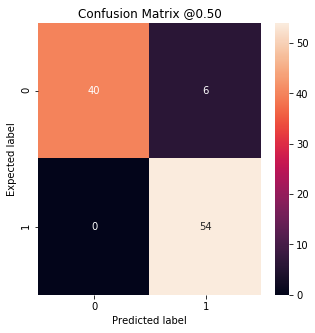

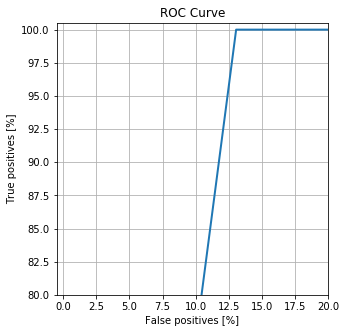

In [4]:
QualityAnalysis(y_true, y_pred, 'binary classification').evaluate()

# Image Multiclass Classification Model with downloaded data

The data for the next example is downloaded passing the argument ```data_url``` to load_data. To access the downloaded data, use ```data_dir``` to load it from the directory.

In [5]:
model_path = './saved_model/flower_photos'
data_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = './datasets/flower_photos'

The method predict() also calculates the predictions for adversarial examples. Setting ```adv=True```, the output of this method is a a tuple with the expected, predicted and adversarial labels.

In [6]:
y_true, y_pred, y_adv = ModelImage().load_model(model_path).load_data(data_dir=data_dir).predict(adv=True)

Found 3670 files belonging to 5 classes.
Using 100 files for validation.


              precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.67      0.78      0.72        23
           2       0.65      0.52      0.58        21
           3       0.58      0.94      0.71        16
           4       0.71      0.57      0.63        21

    accuracy                           0.67       100
   macro avg       0.69      0.68      0.67       100
weighted avg       0.69      0.67      0.66       100



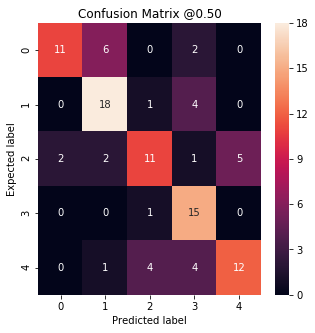

In [7]:
QualityAnalysis(y_true, y_pred, 'multiclass classification').evaluate()

Now, evaluate the robustness of the model checking the performance with adversarial examples.

              precision    recall  f1-score   support

           0       0.25      0.05      0.09        19
           1       0.31      0.17      0.22        23
           2       0.00      0.00      0.00        21
           3       0.25      0.62      0.36        16
           4       0.21      0.33      0.25        21

    accuracy                           0.22       100
   macro avg       0.20      0.24      0.18       100
weighted avg       0.20      0.22      0.18       100



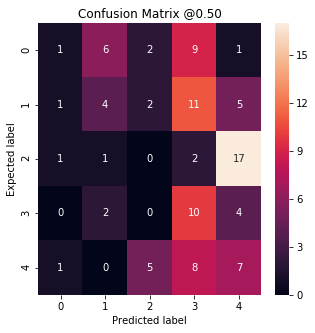

In [8]:
QualityAnalysis(y_true, y_adv, 'multiclass classification').evaluate()

To see an example of the adversarial images, set ```plot=True```. To change the percentage of

Found 3670 files belonging to 5 classes.
Using 100 files for validation.


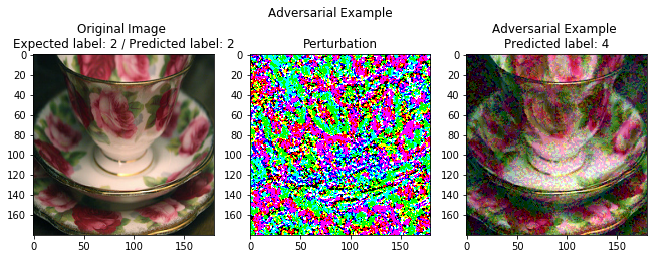

In [9]:
y_true, y_pred, y_adv = ModelImage()
    .load_model(model_path).load_data(data_dir=data_dir)
    .predict(num_examples=1, adv=True, epsilon=0.1, plot=True)

# Regression Model

The model also can address a regression problem. In this case, the functionality analysis will calculate the values of the main regression metrics and plot the expected labels againts the predictions.

mean absolute error              0.08600000000000001
mean squared error               0.00996
coefficient of determination     0.8603888367138111


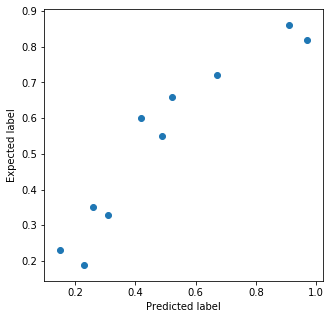

In [10]:
y_true = [0.23, 0.42, 0.97, 0.31, 0.67, 0.26, 0.52, 0.91, 0.15, 0.49]
y_pred = [0.19, 0.60, 0.82, 0.33, 0.72, 0.35, 0.66, 0.86, 0.23, 0.55]

QualityAnalysis(y_true, y_pred, 'regression').evaluate()

# Next steps

How to improve this quality analysis:
- Add methods to data.py to load and preprocess text


- Pass the arguments 'type' and 'task' when instantiating the model interface


- Automate the quality analysis based on the 'type' and 'task' information


- Add comprehensibility analyses


Challenges:
- Handle different input and output shapes


- Preprocess the data to fit the input data of the model